install library

In [1]:
!pip install pandas numpy scikit-learn xgboost matplotlib seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier


 load  dataset

In [2]:
from google.colab import files, drive
import zipfile, os

uploaded = files.upload()
for fn in uploaded.keys():
    print("Uploaded file:", fn)

with zipfile.ZipFile(list(uploaded.keys())[0], 'r') as zip_ref:
    zip_ref.extractall("/content/")



Saving archive student.zip to archive student.zip
Uploaded file: archive student.zip


Explore data

In [3]:


os.listdir("/content")


['.config',
 'student-por.csv',
 'student-merge.R',
 'archive student.zip',
 'student-mat.csv',
 'sample_data']

load dataset

In [4]:
df = pd.read_csv("/content/student-mat.csv", sep=';')
print("✅ Dataset Loaded Successfully!")
df.head()


✅ Dataset Loaded Successfully!


,"school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3"
0,"GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mot..."
1,"GP,F,17,U,GT3,T,1,1,at_home,other,course,fathe..."
2,"GP,F,15,U,LE3,T,1,1,at_home,other,other,mother..."
3,"GP,F,15,U,GT3,T,4,2,health,services,home,mothe..."
4,"GP,F,16,U,GT3,T,3,3,other,other,home,father,1,..."


check missing values

In [5]:
print("Missing values per column:")
print(df.isnull().sum())


Missing values per column:
school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3    0
dtype: int64


simple EDA

In [6]:
print(df.columns.tolist())



['school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3']


CORRECT CSV LOADING

In [7]:
import pandas as pd

# Replace with your actual extracted CSV path
df = pd.read_csv("/content/student-mat.csv", sep=",")
print("✅ Data Loaded Successfully!")
print(df.head())
print(df.columns.tolist())


✅ Data Loaded Successfully!
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'M

VISUALIZATION

/tmp/ipython-input-3656154612.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette='Set2')


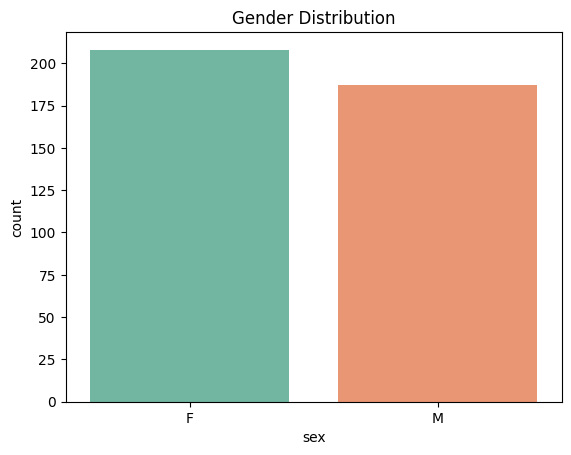

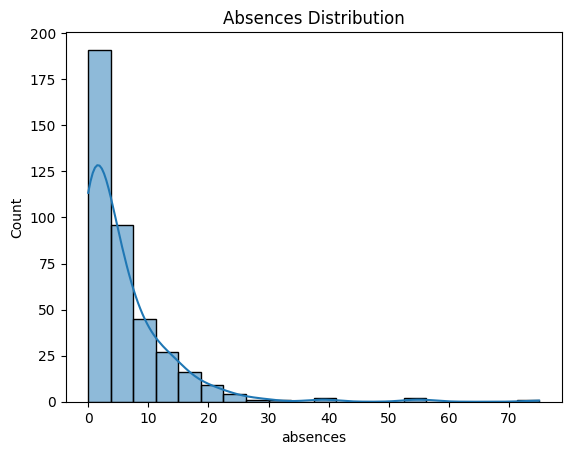

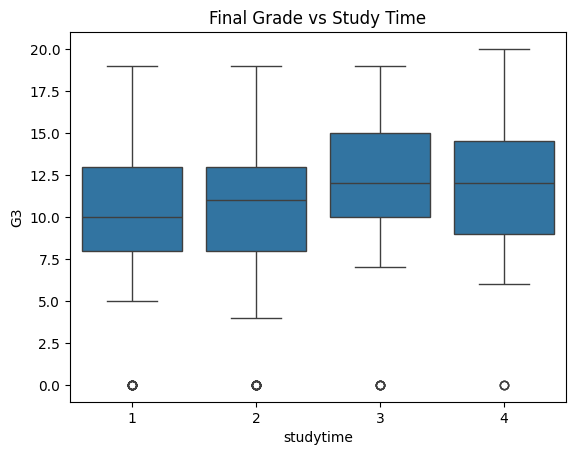

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sex', data=df, palette='Set2')
plt.title("Gender Distribution")
plt.show()

sns.histplot(df['absences'], bins=20, kde=True)
plt.title("Absences Distribution")
plt.show()

sns.boxplot(x='studytime', y='G3', data=df)
plt.title("Final Grade vs Study Time")
plt.show()


SIMPLE EDA

/tmp/ipython-input-2100881345.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette='Set2')


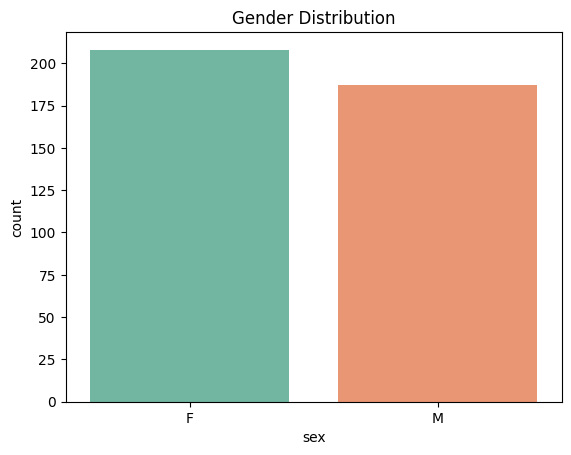

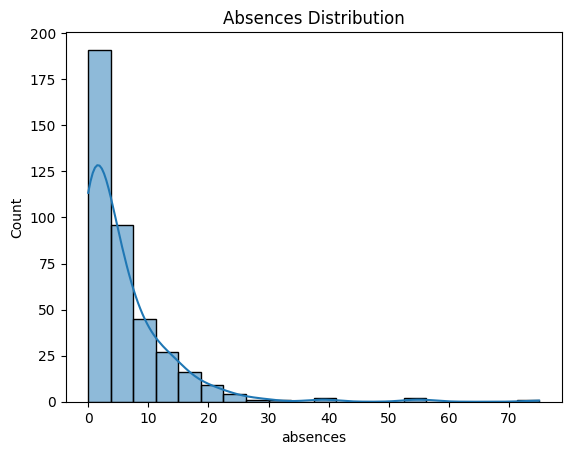

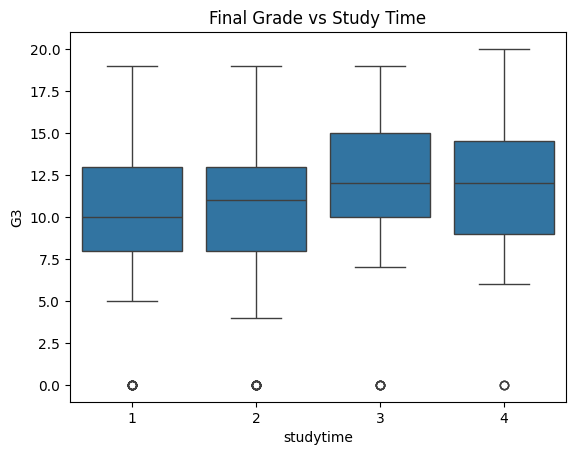

In [9]:
sns.countplot(x='sex', data=df, palette='Set2')
plt.title("Gender Distribution")
plt.show()

sns.histplot(df['absences'], bins=20, kde=True)
plt.title("Absences Distribution")
plt.show()

sns.boxplot(x='studytime', y='G3', data=df)
plt.title("Final Grade vs Study Time")
plt.show()


PREPARE DATA

In [10]:
y = (df['G3'] > 10).astype(int)  # 1=Pass, 0=Fail
X = df.drop(columns=['G3'])
X = pd.get_dummies(X, drop_first=True)
print("✅ Features and target prepared")


✅ Features and target prepared


SPLI DATA


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("✅ Data Split Done")
print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)


✅ Data Split Done
Training size: (316, 41)
Testing size: (79, 41)


Train XGBOOST

In [12]:
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)
print("✅ Model Trained Successfully")


✅ Model Trained Successfully


Evaluate

In [13]:
y_pred = xgb_model.predict(X_test)

print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\n🧩 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))


🎯 Accuracy: 0.9367088607594937

🧩 Confusion Matrix:
 [[35  3]
 [ 2 39]]

📄 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93        38
           1       0.93      0.95      0.94        41

    accuracy                           0.94        79
   macro avg       0.94      0.94      0.94        79
weighted avg       0.94      0.94      0.94        79



Feature importance

✅ XGBoost Accuracy: 0.9367088607594937


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [06:54:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


<Figure size 1000x600 with 0 Axes>

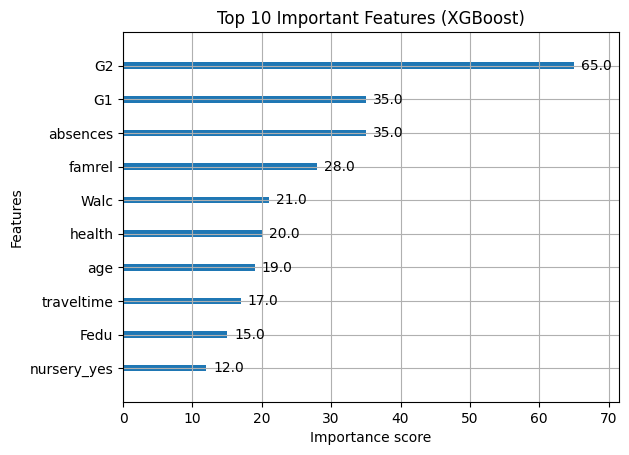

In [14]:
# Step 1️⃣ - Install and Import XGBoost
!pip install xgboost

import xgboost as xgb
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Step 2️⃣ - Assume you already have your dataset loaded and split
# Example (if not already done)
# y = (df['G3'] > 10).astype(int)
# X = df.drop(columns=['G3'])
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3️⃣ - Train XGBoost Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Step 4️⃣ - Evaluate Accuracy
y_pred = xgb_model.predict(X_test)
print("✅ XGBoost Accuracy:", accuracy_score(y_test, y_pred))

# Step 5️⃣ - Plot Feature Importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_model, max_num_features=10)
plt.title("Top 10 Important Features (XGBoost)")
plt.show()

